<a href="https://colab.research.google.com/github/Parth-107/Titanic_ML_from_Disaster/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
#Clone github ripository
!git clone https://github.com/Parth-107/Titanic_ML_from_Disaster.git


fatal: destination path 'Titanic_ML_from_Disaster' already exists and is not an empty directory.


In [111]:
#%rm -rf Titanic_ML_from_Disaster

In [112]:
#Import depedencies
%matplotlib inline

#Some python imports
import math, time, random, datetime

#Working with data
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#For preprocessing data
from sklearn.preprocessing import OneHotEncoder, label_binarize, LabelEncoder

#Machine Learning Libraries
!pip3 install catboost
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv 

In [113]:
#read train and test data, and gender_sub data
train= pd.read_csv("/content/Titanic_ML_from_Disaster/titanic/train.csv")
test= pd.read_csv("/content/Titanic_ML_from_Disaster/titanic/test.csv")
gender_sub = pd.read_csv("/content/Titanic_ML_from_Disaster/titanic/gender_submission.csv")

In [114]:
#View the training data sets
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
#View the testing data sets
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
#View gender_submission data sets
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


survival: **0 = No, 1 = Yes**
pclass (Ticket class): 	**1 = 1st, 2 = 2nd, 3 = 3rd**
sex: 	**Sex** 	
Age: 	**Age in years** 	
sibsp: **No. of siblings / spouses aboard the Titanic** 	
parch: **No. of parents / children aboard the Titanic** 	
ticket: **Ticket number** 	
fare: **Passenger fare** 	
cabin: **Cabin number** 	
embarked (Port of Embarkation): **C = Cherbourg, Q = Queenstown, S = Southampton**

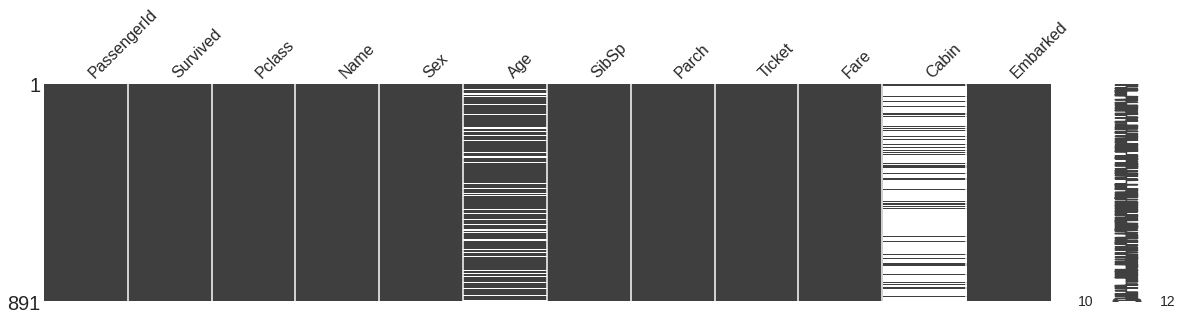

In [117]:
#Let's find the missing values in our data set
missingno.matrix(train, figsize=(20,4))

In [118]:
#Find the total missing values
def find_missing_val(df, col):
  miss_val= {}
  print("Number of missing values or NaN values for each columns...")
  def_len= len(df)
  for i in col:
    total_col_val = df[i].value_counts().sum()
    miss_val[i] = def_len - total_col_val
  return miss_val

find_missing_val(train, train.columns) 

Number of missing values or NaN values for each columns...


{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [119]:
#Or you can you this alternative way as well to find the total number of NaN value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
df_bin = pd.DataFrame() # for discretised continuous variables (i.e 1-5, 5-10...)
df_con = pd.DataFrame() # for continuous variables (i.e 1-10)

#**Our target Feature: Survived**

if 1 means Survived, and if 0 menas not Survived

0    549
1    342
Name: Survived, dtype: int64


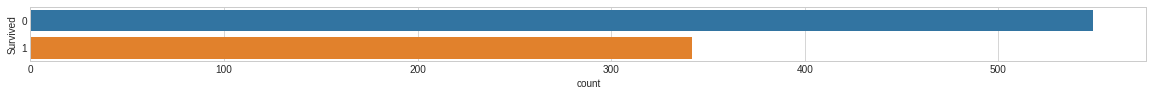

In [121]:
#Let's visualized how many people were survived
fig= plt.figure(figsize=(20,1))
sns.countplot(y="Survived", data=train)
print(train.Survived.value_counts())

In [122]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

#**Feature: Pclass**

Which means the ticket class os the passengers

In [123]:
# Check here how many missing variables does Pclass have
train.Pclass.isnull().sum()

0

In [124]:
#Ok we dont't have so add this i  our data frame as well
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

#**Feature: Name**

Which means the name of the **passengers**

In [125]:
#Let's look at the Name data
train.Name.value_counts()

Saundercock, Mr. William Henry         1
Gill, Mr. John William                 1
Nicola-Yarred, Master. Elias           1
Butler, Mr. Reginald Fenton            1
Dean, Master. Bertram Vere             1
                                      ..
Richard, Mr. Emile                     1
Nakid, Miss. Maria ("Mary")            1
Duane, Mr. Frank                       1
Nasser, Mrs. Nicholas (Adele Achem)    1
White, Mr. Richard Frasar              1
Name: Name, Length: 891, dtype: int64

#**Feature: Sex (gender)**

Gender of the passnegers (male or female)**bold text**





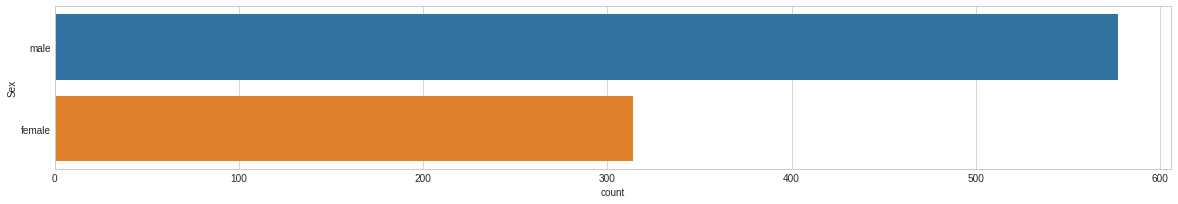

In [126]:
plt.figure(figsize=(20,3))
sns.countplot(y="Sex", data= train)

In [127]:
#Let's checkout if there are any missing values or not in it
train.Sex.isnull().sum()

0

In [128]:
#Add the sex as well in subste dataframe that we have created for Survived
df_bin['Sex']= train['Sex']

#Now give the Female to 1 and if male then 0 (oue type of onehot encoding)
df_bin['Sex']= np.where(df_bin['Sex'] == 'female', 1, 0)
#in df_con keep it original values
df_con['Sex']= train['Sex']

df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


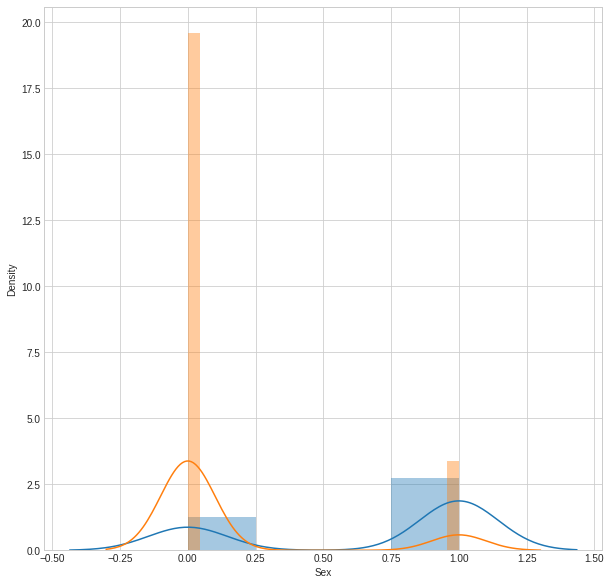

In [129]:
#Now compare the Sex and Survived as they both are in binary form
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

In [130]:
#If we want the we can remove the NaN values form the Age col by dropping those rows but let's move ahead
#train.dropna(axis=0, how='all', subset=['Age'], inplace=True)


Function to create count and distribution visualisations


In [131]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 4), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

#**Feature: SebSp**

Which means the number of siblings / spouses the passenger has.

In [132]:
#Check for NaN valu in SebSp col
train.SibSp.isnull().sum()

0

In [133]:
#Ok add that in our data frame
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [134]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We can see that most of thme don't have siblings or spouse

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


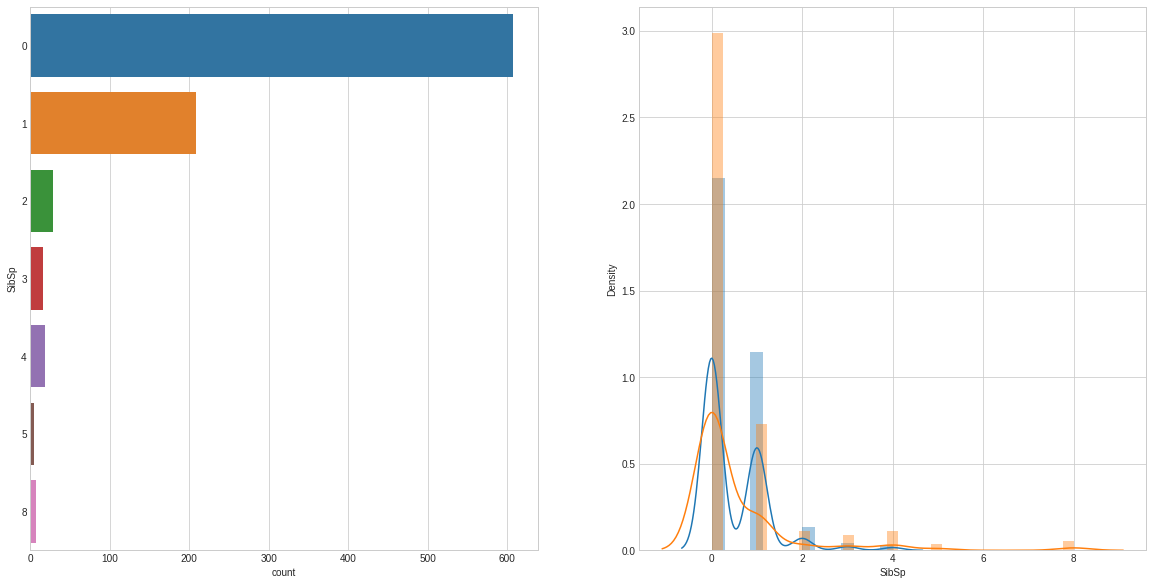

In [135]:
#Same thing Visulalize it with label Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

#**Feature: Parch**

Means, the number of parents / children the passenger has. 

In [136]:
#Agian check for NaN values
train.Parch.isnull().sum()

0

In [137]:
# Add Parch to our subset dataframe
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


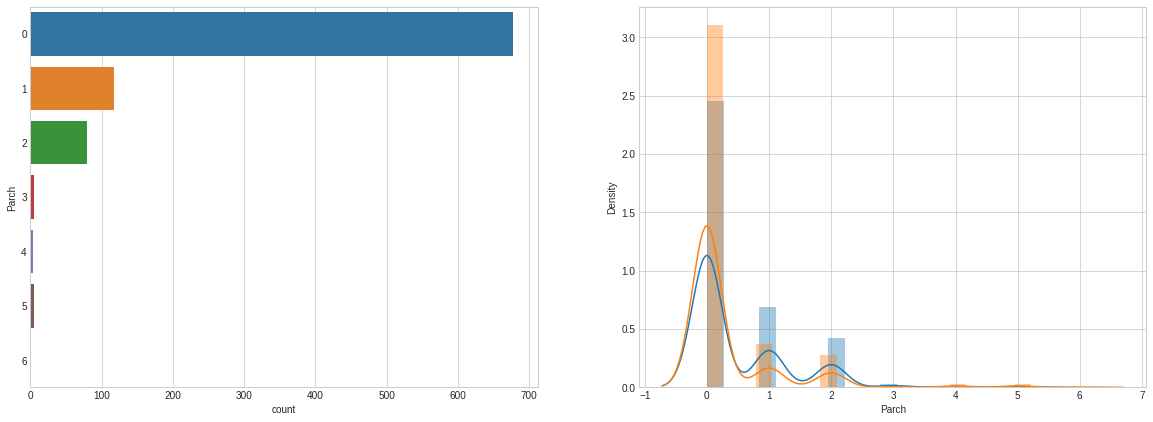

In [138]:
#Visulaize the counts of Parch
plot_count_dist(data= train,
                bin_df= df_bin,
                label_column= 'Survived',
                target_column= 'Parch',
                figsize=(20,7))

#**Feature: Tickets** 

In [139]:
#Agian check for NaN values
train.Ticket.isnull().sum()

0

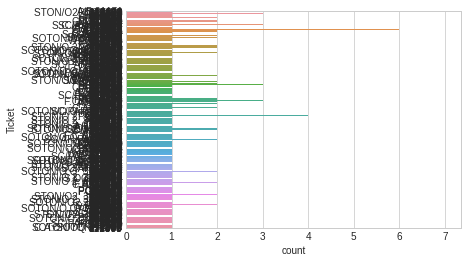

In [140]:
# How many kinds of different tickets are there
sns.countplot(y="Ticket", data=train);

It's not looking so good, so let's see in number form

In [141]:
train.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
3101295              6
CA 2144              6
                    ..
SOTON/OQ 3101316     1
2926                 1
111428               1
347466               1
SOTON/O.Q. 392087    1
Name: Ticket, Length: 681, dtype: int64

In [142]:
#Let's see how many types of differenet tickets values are
print("There are {} types of ticket values..".format((len(train.Ticket))))

There are 891 types of ticket values..


We need to reduce the **Ticket features**, but for now let's move forward.


#**Feature: Fare**

Means the ticket cost.


In [143]:
train.Fare.isnull().sum()

0

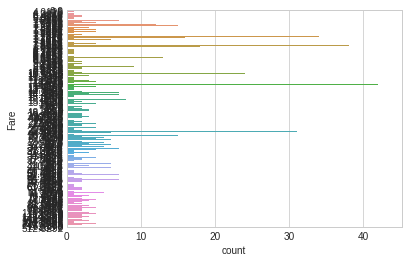

In [144]:
#Check out how many different values of Fare are there in data set
sns.countplot(y="Fare", data=train)

In [145]:
print("There are {} different values are in Fare,".format(len(train.Fare)), "Data type is {}.".format(train.Fare.dtype))

There are 891 different values are in Fare, Data type is float64.


In [146]:
#Add the Fare to sub dataframe
df_con['Fare']= train['Fare'] 
df_bin['Fare']= pd.cut(train['Fare'], bins=5)#This converts to categorical variable into 5 bins or bucket

#Let's check how it looks like
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


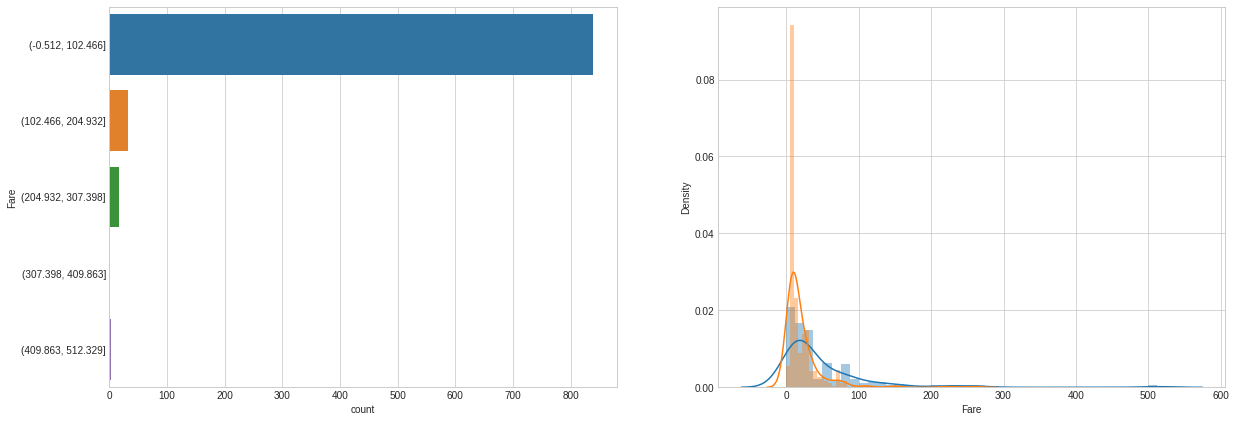

In [147]:
# Visualise the Fare bin counts as well as the Fare distribution with the labele Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,7), 
                use_bin_df=True)


**Feature: Cabin**

Number of cabins where the passenger was staying.


In [148]:
# Check for missing values
train.Cabin.isnull().sum()

687

687 is pretty huge number, we can see what we can do for Cabin numbers, but for now let's move further..


**Feature: Embarked**

The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton


In [149]:
# Check for missing values
train.Embarked.isnull().sum()

2

In [150]:
# What kind of values are there
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

It seems it has catagorical values

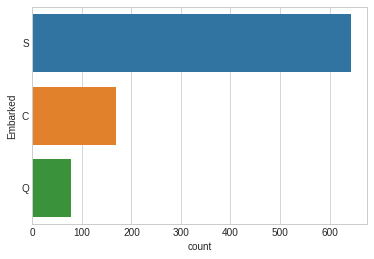

In [151]:
# Visualize this using cluntplot
sns.countplot(y='Embarked', data=train);

In [152]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [153]:
#Remove NaN values by removing those rows
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889



#**Feature Encoding**

Now we have our two sub dataframes ready. We can encode the features now, so we can feed in our machine learning model

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.


In [154]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [155]:
#One_hot encoder on bin data set
One_hot_col= df_bin.columns.tolist()
One_hot_col.remove('Survived')

df_bin_encode= pd.get_dummies(data=df_bin, columns=One_hot_col)
df_bin_encode.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [156]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


One hot encode the categorical columns (df_con)

In [157]:
#First do one_hot_encoding on Pclass col
df_Pclass_encode= pd.get_dummies(data= df_con['Pclass'], prefix='pclass')

#one_hot_encoding on Sex col
df_Sex_encode= pd.get_dummies(data= df_con['Sex'], prefix='sex')

#one_hot_encoding on Embarked col
df_Embarked_encode= pd.get_dummies(data= df_con['Embarked'], prefix='embarked')

#Fit those columns into our df_con
df_con_encode= pd.concat([df_con,
                          df_Embarked_encode,
                          df_Sex_encode,
                          df_Pclass_encode], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_encode = df_con_encode.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

df_con_encode.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


#**Start bulding Machine Learning models**

Seperate the data into x_train and y_train sets

In [158]:
#We need to use df_con_encode data set for trainig purpose
selected_df = df_con_encode

In [159]:
#Split the dataframe into x_trains menas data and y_train means lables
x_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived

x_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


#Define the function to try different ML algorithm

In [160]:
# Function that runs choosen algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

#1) Decision Tree Classifier

In [161]:
start_time = time.time()

train_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),
                                       x_train,
                                       y_train,
                                       50)
dt_time = (time.time() - start_time)
print("Accuracy is: %s" % acc_dt)
print("Accuracy of Cross Validation 50-Fold: %s" % acc_cv_dt)
print("Running Time is : %s" % datetime.timedelta(seconds=dt_time))

Accuracy is: 92.46
Accuracy of Cross Validation 50-Fold: 81.44
Running Time is : 0:00:01.927866



#2)Gradient Boost Trees


In [162]:
start_time = time.time()

train_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),
                                             x_train,
                                             y_train,
                                             50)

dt_time = (time.time() - start_time)
print("Accuracy is: %s" % acc_gbt)
print("Accuracy of Cross Validation 50-Fold: %s" % acc_cv_gbt)
print("Running Time is : %s" % datetime.timedelta(seconds=dt_time))

Accuracy is: 86.61
Accuracy of Cross Validation 50-Fold: 81.78
Running Time is : 0:00:05.415583



#3)K-Nearest Neighbours


In [163]:
start_time = time.time()

train_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(),
                                             x_train,
                                             y_train,
                                             10)

dt_time = (time.time() - start_time)
print("Accuracy is: %s" % acc_knn)
print("Accuracy of Cross Validation 10-Fold: %s" % acc_cv_knn)
print("Running Time is : %s" % datetime.timedelta(seconds=dt_time))

Accuracy is: 83.58
Accuracy of Cross Validation 10-Fold: 77.39
Running Time is : 0:00:00.242670


#4)CatBoost algoritm

In [172]:
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])


This means Catboost has picked up that all variables except **Fare** can be treated as categorical.


In [178]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool= Pool(x_train,
                 y_train,
                 cat_features)

#Denife the model
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

#Fit the model
catboost_model.fit(train_pool)

#Accuracy
acc_catboost= round(catboost_model.score(x_train, y_train)* 100, 2)

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 57.7ms	remaining: 57.7s
1:	learn: 0.6809444	total: 62.2ms	remaining: 31s
2:	learn: 0.6751692	total: 68.4ms	remaining: 22.7s
3:	learn: 0.6689060	total: 71.7ms	remaining: 17.9s
4:	learn: 0.6632144	total: 75ms	remaining: 14.9s
5:	learn: 0.6576488	total: 77.7ms	remaining: 12.9s
6:	learn: 0.6544441	total: 79ms	remaining: 11.2s
7:	learn: 0.6490635	total: 82.2ms	remaining: 10.2s
8:	learn: 0.6443241	total: 85.6ms	remaining: 9.42s
9:	learn: 0.6395935	total: 88.9ms	remaining: 8.8s
10:	learn: 0.6345186	total: 91.5ms	remaining: 8.22s
11:	learn: 0.6305316	total: 94.6ms	remaining: 7.79s
12:	learn: 0.6275610	total: 96.3ms	remaining: 7.31s
13:	learn: 0.6225020	total: 99.4ms	remaining: 7s
14:	learn: 0.6179503	total: 102ms	remaining: 6.73s
15:	learn: 0.6140480	total: 106ms	remaining: 6.54s
16:	learn: 0.6100034	total: 110ms	remaining: 6.34s
17:	learn: 0.6049646	total: 114ms	remaining: 6.21s
18:	learn: 0.6025760	total: 115ms	remaining: 5.95s
19:	lea

Now let's perform cross-validation on Catboost

In [191]:
# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

#Run cross validation
cv_catboost= cv(train_pool, cv_params, fold_count= 10)

# Accuracy of CatBoost CV results 
acc_cv_catboost = round(np.max(cv_catboost['test-Accuracy-mean']) * 100, 2)

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4893301	test: 0.4638872	best: 0.4638872 (24)	total: 87.6ms	remaining: 3.42s
25:	learn: 0.4846609	test: 0.4581783	best: 0.4581783 (25)	total: 91.2ms	remaining: 3.42s
26:	learn: 0.4812979	test: 0.4546720	best: 0.4546720 (26)	total: 94.5ms	remaining: 3.4s
27:	learn: 0.4773794	test: 0.4509130	best: 0.4509130 (27)	total: 97.7ms	remaining: 3.39s
28:	learn: 0.4759959	test: 0.4490016	best: 0.4490016 (28)	total: 99.2ms	remaining: 3.32s
29:	learn: 0.4726830	test: 0.4445672	best: 0.4445672 (29)	total: 103ms	remaining: 3.32s
30:	learn: 0.4686808	test: 0.4400542	best: 0.4400542 (30)	total: 107ms	remaining: 3.35s
31:	learn: 0.4656687	test: 0.4373876	best: 0.4373876 (31)	total: 113ms	remaining: 3.41s
32:	learn: 0.4629759	test: 0.4342703	best: 0.4342703 (32)	total: 116ms	remaining: 3.4s
33:	learn: 0.4619416	test: 0.4328279	best: 0.4328279 (33)	total: 119ms	remaining: 3.38s
34:	learn: 0.4610411	test: 0.4314925	best: 0.4314925 (34)	total: 1

In [192]:
#Look at the accuracy and cv_accuracy
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))

Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32


In [196]:
#Look at accuracy of all three algorithm
models = pd.DataFrame({
    'Model': ['KNN', 'Gradient Boosting Trees', 'Decision Tree','Cat Boost'],
    'Score': [
        acc_knn,
        acc_gbt,   
        acc_dt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
2,Decision Tree,92.46
1,Gradient Boosting Trees,86.61
3,Cat Boost,83.91
0,KNN,83.58


In [193]:
#Look at Cross-validation accuracy of all three algorithm
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Gradient Boosting Trees', 'Decision Tree', 'CatBoost'],
    'Score': [
        acc_cv_knn,
        acc_cv_gbt,   
        acc_cv_dt,
        acc_cv_catboost
    ]})
print("---Cross validation Accuracy Scores---")
cv_models.sort_values(by='Score', ascending=False)

---Cross validation Accuracy Scores---


,Model,Score
1,Gradient Boosting Trees,81.78
2,Decision Tree,81.44
3,CatBoost,81.32
0,KNN,77.39


Here CatBoost algorithm works well because it has highr accuracy just in 10 times cross validation, but in Gradient Boosting trees need 50 times Cross validation. 

#Submission

In [167]:
x_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [168]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
#Add the one hot emcoded colmuns into test data set
test_pclass_encode= pd.get_dummies(test['Pclass'], prefix='pclass')

test_sex_encode= pd.get_dummies(test['Sex'], prefix='sex')

test_embarked_encode= pd.get_dummies(test['Embarked'], prefix='embarked')

In [170]:
#Concate these one hot encoded colms into test set
test= pd.concat([test,
                 test_embarked_encode,
                 test_pclass_encode,
                 test_sex_encode], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,sex_female,sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1,1,0


In [197]:
#Create the list of columns that we need for prediction
want_col= x_train.columns

want_col

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [199]:
prediction= catboost_model.predict(test[want_col])

prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [206]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [207]:
sub_df = pd.DataFrame()
sub_df['PassengerId'] = test['PassengerId']
sub_df['Survived'] = prediction

sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [209]:
sub_df.to_csv('submission.csv', index=False)